In [1]:
#Step 1  import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from sklearn.model_selection import train_test_split, cross_val_score #cross validation is extra we add
from sklearn.linear_model import LinearRegression, Ridge, Lasso # here we also add Ridge, Lasso
from sklearn import metrics
import scipy.stats as stats

In [3]:
# Step 2 data loading
df = pd.read_csv('Ecommerce Customers.csv') 

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


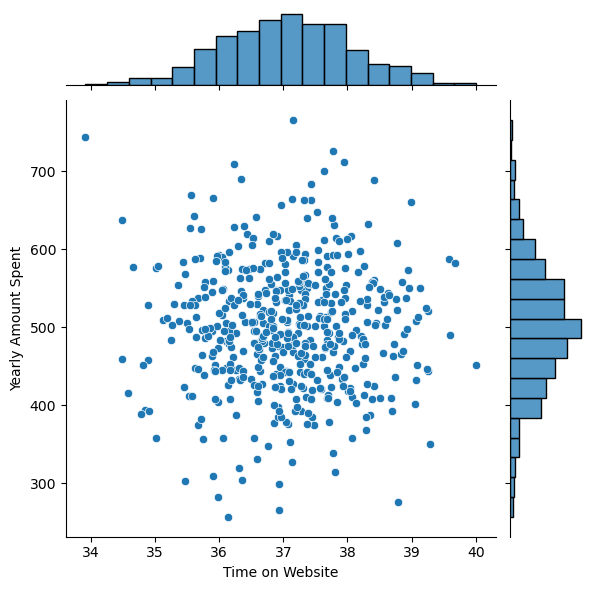

In [11]:
# Step 3 Exploratory Data Analysis

# Jointplot: Time on Website vs Yearly Amount Spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)
plt.show()

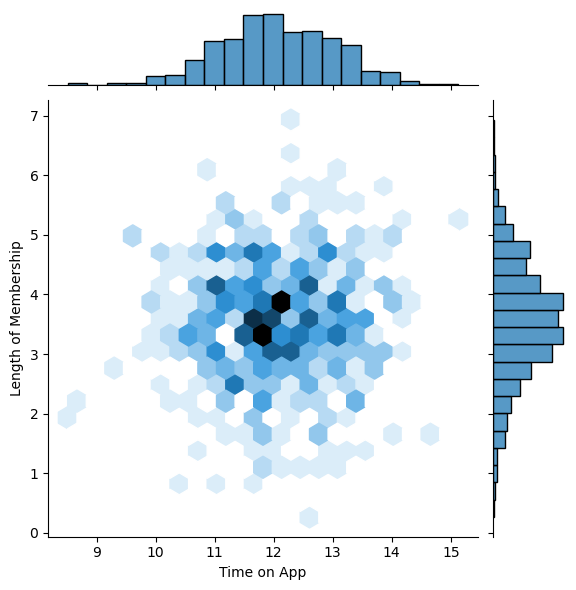

In [13]:
# Jointplot: Time on App vs Length of Membership (hex bin)
sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')
plt.show()

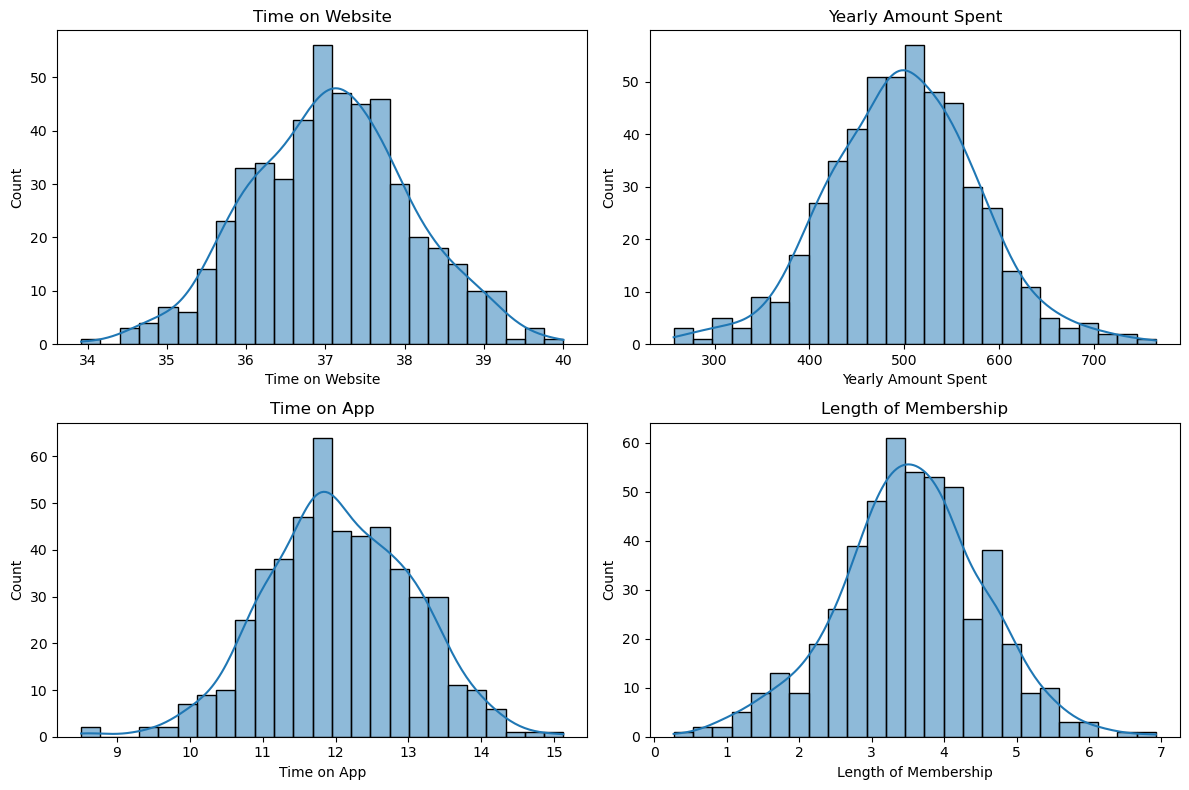

In [15]:
# Extra add this step to easylly undrestand 

features = ['Time on Website','Yearly Amount Spent','Time on App','Length of Membership']

plt.figure(figsize=(12,8))
for i, col in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], bins=25, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


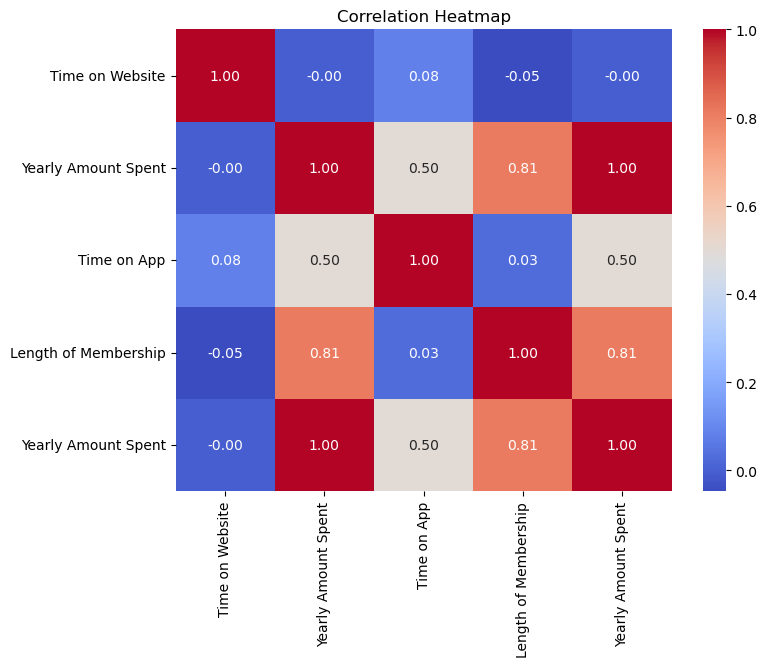

In [17]:
plt.figure(figsize=(8,6))
corr = df[features + ['Yearly Amount Spent']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

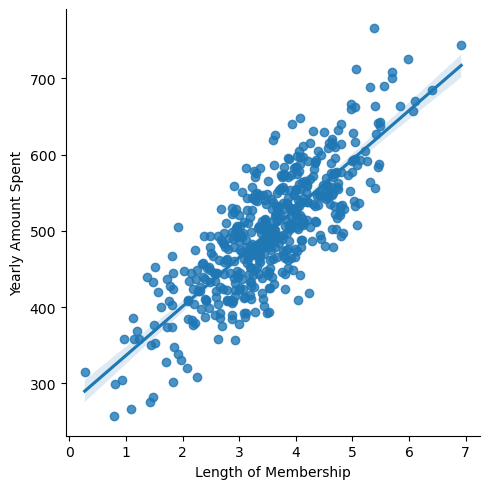

In [19]:
# Linear model plot: Yearly Amount Spent vs Length of Membership
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.show()

In [21]:
# step 4 Training and Testing Data

df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [33]:
X=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership' ]]
y=df['Yearly Amount Spent']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (350, 4) Test size: (150, 4)


In [42]:
# Step 5 Training the model

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lm.coef_}).set_index('Feature')
coeff_df

,Coefficient
Feature,
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


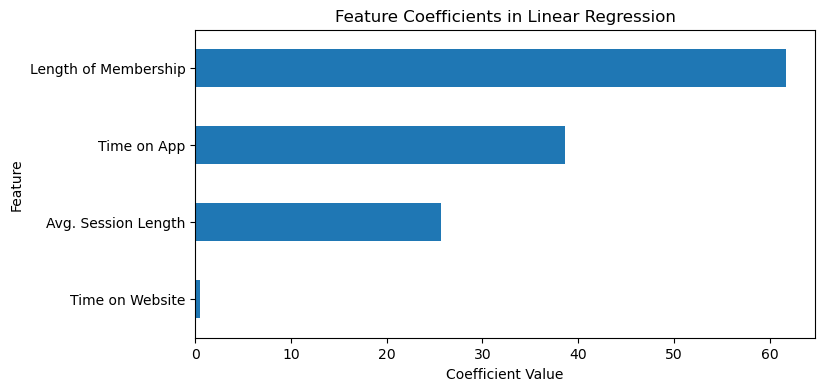

In [46]:
coeff_df['Coefficient'].sort_values().plot(kind='barh', figsize=(8,4))
plt.title("Feature Coefficients in Linear Regression")
plt.xlabel("Coefficient Value")
plt.show()

In [49]:
# 1. Prediction vs Actual (for overall performance)
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

NameError: name 'predictions' is not defined